In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
from scipy import signal
import pandas as pd

In [3]:
azimuth = np.array([61.]) / 180. * np.pi
distance = 2.  # meters
c = 343.    # speed of sound
fs , signal_wav = wavfile.read("/Users/youssef/Documents/EPFL/Semester_Project/Dataset/GDWN/audiocheck.net_whitenoisegaussian.wav")  # sampling frequency
nfft = 256  # FFT size
freq_range = [300, 3500]
center = [2, 1.5]
snr_db = 5.    # signal-to-noise ratio
sigma2 = 10**(-snr_db / 10) / (4. * np.pi * distance)**2
print(nfft/2)

128.0


In [4]:
# Create an anechoic room
room_dim = np.r_[5.,5.]
aroom = pra.ShoeBox(room_dim, fs=fs, max_order=0, sigma2_awgn=sigma2)

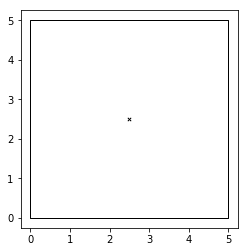

In [5]:
echo = pra.circular_2D_array(center = [2.5,2.5], M=4, phi0=0, radius=0.0047746483)
#echo = np.concatenate((echo, np.array(center, ndmin=2).T), axis=1)
aroom.add_microphone_array(pra.MicrophoneArray(echo, aroom.fs))
fig, ax = aroom.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[3.46961924 4.24923941]
1.064650843716541


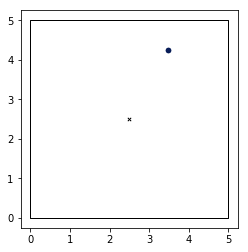

In [6]:
# Add sources of 1 second duration
rng = np.random.RandomState(23)
duration_samples = int(fs)

for ang in azimuth:
    source_location = room_dim / 2 + distance * np.r_[np.cos(ang), np.sin(ang)]
    print(source_location)
    print(ang)
    source_signal = rng.randn(duration_samples)
    aroom.add_source(source_location, signal=source_signal)
    
# Run the simulation
aroom.simulate()

fig, ax = aroom.plot()

In [8]:
print("Simulated propagation to first mic:")
IPython.display.Audio(aroom.mic_array.signals[0,:], rate=fs)

Simulated propagation to first mic:


In [9]:
print(aroom.mic_array.signals[0,:].shape)

(44454,)


Text(0, 0.5, 'Frequency [Hz]')

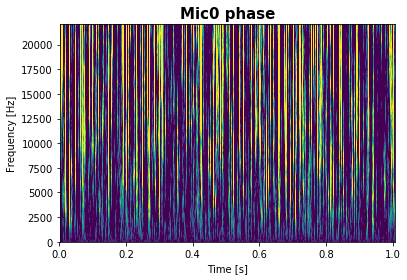

In [10]:
plt.specgram(aroom.mic_array.signals[0,:].astype(np.float32), NFFT=256, Fs=fs, mode='phase', vmin=0, vmax=30) 
plt.title('Mic0 phase', fontsize=15, fontweight="bold")
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

In [11]:
matrix = np.empty((4, 129, 349))

In [12]:
 f, t, stft_mic0 = signal.stft(aroom.mic_array.signals[0,:].astype(np.float32), fs)#the overlap is by default at 50%


In [13]:
print("Sample frequencies",f.shape)
print(f[0:20])
print("Segement times",t.shape)
print(t[0:20])
print("STFTs",stft_mic0.shape)
print(stft_mic0[0:20])


Sample frequencies (129,)
[   0.        172.265625  344.53125   516.796875  689.0625    861.328125
 1033.59375  1205.859375 1378.125    1550.390625 1722.65625  1894.921875
 2067.1875   2239.453125 2411.71875  2583.984375 2756.25     2928.515625
 3100.78125  3273.046875]
Segement times (349,)
[0.         0.00290249 0.00580499 0.00870748 0.01160998 0.01451247
 0.01741497 0.02031746 0.02321995 0.02612245 0.02902494 0.03192744
 0.03482993 0.03773243 0.04063492 0.04353741 0.04643991 0.0493424
 0.0522449  0.05514739]
STFTs (129, 349)
[[ 5.0279126e-04+0.0000000e+00j  4.6247906e-06+0.0000000e+00j
   1.7317766e-03+0.0000000e+00j ... -2.2582905e-03+0.0000000e+00j
   3.3784602e-04+0.0000000e+00j  1.5272773e-04+0.0000000e+00j]
 [-7.9870870e-04+2.4089293e-05j  3.1812553e-04+1.3527924e-03j
   8.7826615e-05-1.6799630e-04j ...  2.5124999e-03-1.2574814e-03j
  -1.3469413e-03+2.9001944e-03j  1.2474733e-04-8.9415131e-05j]
 [ 7.2985876e-04-6.9906376e-04j -4.2444415e-04-1.0724538e-03j
  -7.8371301e-04+1.349

In [14]:
spectrum = stft_mic0
print(spectrum.shape)
magnitude = np.abs(spectrum)
phase = np.angle(spectrum)
print("Magnitude",magnitude[0:20])
print("Phase",phase[0:20])
print(phase.shape)

matrix[0] = phase
print(matrix[0])

(129, 349)
Magnitude [[5.0279126e-04 4.6247906e-06 1.7317766e-03 ... 2.2582905e-03
  3.3784602e-04 1.5272773e-04]
 [7.9907192e-04 1.3896946e-03 1.8956864e-04 ... 2.8096111e-03
  3.1977145e-03 1.5348278e-04]
 [1.0106354e-03 1.1533906e-03 1.5604756e-03 ... 3.8032478e-03
  4.2671380e-03 1.5561540e-04]
 ...
 [2.3303083e-03 3.1448549e-03 3.8907619e-03 ... 2.7185690e-03
  2.4168571e-03 1.7361282e-04]
 [1.6469555e-03 1.8654265e-03 2.9245086e-03 ... 1.5530877e-03
  1.3755186e-03 1.6839005e-04]
 [6.7910488e-04 1.9538135e-03 1.8844166e-03 ... 1.5270939e-03
  5.4649671e-04 1.5989858e-04]]
Phase [[ 0.          0.          0.         ...  3.1415925   0.
   0.        ]
 [ 3.1114416   1.3398308  -1.0890841  ... -0.46403962  2.0055864
  -0.6218925 ]
 [-0.76385033 -1.9476501   2.0969687  ... -2.3247683  -0.6910436
  -1.2510742 ]
 ...
 [ 0.8952323  -2.9235742  -0.10046452 ...  1.8893512  -3.0040338
   0.08033015]
 [-2.8986876  -0.05875085 -3.047674   ... -1.7518722  -0.18932228
  -0.7218214 ]
 [-0.05965

In [15]:
for i in range(4):
    f, t, stft_mic0 = signal.stft(aroom.mic_array.signals[i,:].astype(np.float32), fs)
    spectrum = stft_mic0
    magnitude = np.abs(spectrum)
    phase = np.angle(spectrum)
    matrix[i] = phase

In [16]:
print(matrix[3].shape)

(129, 349)


In [17]:
type(aroom)

pyroomacoustics.room.ShoeBox

In [18]:
dataset = pd.DataFrame(columns = ['Room','Distance_Mic','RT60','SNR','Audio_file','Index_PM','label'])
dataset.Room = 0
dataset.Distance_Mic = 1
dataset.RT60 = 0.2
dataset.RNR = 0
dataset.Index_PM = 0
dataset.label = 1
dataset.Audio_file = aroom.mic_array.signals

Exception: Data must be 1-dimensional

In [39]:
np.histogram([0, 1, 2,3,4,5,6,7], bins=4)

(array([2, 2, 2, 2]), array([0.  , 1.75, 3.5 , 5.25, 7.  ]))

In [42]:
bins = np.linspace(0, 180, 37)
bins

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180.])

In [43]:
values = np.random.randint(0, 180, 10)
values

array([ 75, 162,  25,  23, 111, 167,  61, 103, 147,  65])

In [46]:
pos = np.digitize(21, bins)
pos

5

In [51]:
angles = np.random.uniform(low=0, high=180, size=(7,))

In [52]:
angles

array([ 72.99476282,  29.76939813,  16.24340928, 101.22163383,
        64.86436457,  80.98745655,  98.0032781 ])